# Clasificadores con scikit-learn #
Se va a ver las diferencias entre varios algoritmos de aprendizaje automático supervisado para la clasificación, viendo sus fortalezas y debilidades individuales. Se va a utilizar la librería scikit-learn que ofrece una interfaz amigable y consistente para utilizar esto algoritmos de forma eficiente y productiva.

Los temas que se van a cubir son:
- Una introducción a algoritmos populares y robustos para la clasificación, como la regresión logística, maquinas de vectores de soporte y árboles de decisiones
- Ejemplos de la utilización de la librería de aprendizaje automático scikit-learn.
- Discusiones sobre las fortalezas y debilidades de los clasificadores con límites de decisión lineales y no lineales.

## Elección de un algoritmo de clasificación ##
La elección de un algoritmo de clasificación apropiado para un problema en particular requiere práctica y experiencia; cada algoritmo tiene sus propias peculiaridades y se basa en ciertos supuestos. En la práctica, siempre se recomienda comparar el rendimiento de al menos un puñado de algoritmos de aprendizaje diferentes para seleccionar el mejor modelo para el problema en particular; estos pueden diferir en la cantidad de características o ejemplos, la cantidad de ruido en un conjunto de datos y si las clases son linealmente separables o no.

Al final, el rendimiento de un clasificador, tanto el rendimiento computacional como el poder predictivo, depende en gran medida de los datos subyacentes disponibles para el aprendizaje. Los cinco pasos principales que intervienen en la capacitación de un algoritmo de aprendizaje automático supervisado se pueden resumir de la siguiente manera:
1. Seleccionar características y recopilar ejemplos de entrenamiento etiquetados.
2. Elegir una métrica de rendimiento.
3. Elegir un clasificador y algoritmo de optimización.
4. Evaluar el rendimiento del modelo.
5. Afinando el algoritmo.


## Entrenar un preceptron ##
Para comenzar con la biblioteca scikit-learn, entrenaremos un modelo de perceptrón similar al que implementamos por nosotros mismo.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from sklearn import datasets
import numpy as np

Convenientemente, el conjunto de datos de Iris ya está disponible a través de scikit-learn, solo usaremos dos caracteristicas del conjunto de datos de Iris con fines de visualización.

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Etiquetas de clases', np.unique(y))

Etiquetas de clases [0 1 2]


La función `np.unique(y)` devuelve las tres etiquetas de clase almacenadas en `iris.target`, y como se puede ver, los nombres de las clases de flores Iris, `Iris-setosa`, `Iris-versicolor` e `Iris-virginica`, ya están almacenados como enteros. (aquí: `0`, `1`, `2`). La utilización de etiquetas enteras es un práctica recomendada para evitar problemas técnicos y mejorar el rendimiento computacional debido a una menor utilización de memoria.

Para evaluar lo bien se comporta un modelo entrenado en datos no vistos, dividiremos aún más el conjunto de datos en conjuntos de datos de prueba y entrenamiento separados.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

##### Partición aleatoria #####
Utilizando la función `train_test_split` del módulo `model_selection` de scikit-learn, **dividimos aleatoriamente** las matrices X e y en 30 por ciento de datos de prueba (45 ejemplos) y 70 por ciento de datos de entrenamiento (105 ejemplos).
##### Mezcla del conjunto de datos #####
La función `train_test_split` ya **baraja** el conjunto de datos de entrenamiento internamente antes de dividirlos. A través del parámetro `random_state`, proporcionamos una semilla aleatoria fija (`random_state = 1`) para el generador interno de números pseudoaleatorios que se utiliza para barajar los conjuntos de datos antes de la división. Utilizando una semilla fija garantiza que los resultados sean reproducibles.
##### Estratificación #####
Por último, aprovechamos el soporte incorporado para la estratificación a través de `stratify = y`. En este contexto, la **estratificación** significa que el método `train_test_split` devuelve subconjuntos de entrenamiento y prueba que tienen las mismas proporciones de etiquetas de clase que el conjunto de datos de entrada. Se puede utilizar la función `bincount` de NumPy, que cuenta el número de ocurrencias de cada valor en una matriz, para verificar que este sea el caso:

In [5]:
print('Cuenta de eitquetas en y:', np.bincount(y))
print('Cuenta de eitquetas en y_train:', np.bincount(y_train))
print('Cuenta de eitquetas en y_test:', np.bincount(y_test))

Cuenta de eitquetas en y: [50 50 50]
Cuenta de eitquetas en y_train: [35 35 35]
Cuenta de eitquetas en y_test: [15 15 15]


##### Escalado de las caracteristicas #####
Muchos algoritmos de aprendizaje automático y optimización también requieren un **escalado de las caracteristicas** para un rendimiento óptimo. Se va a utilizar la clase `StandardScaler` del módulo `preprocessing` de scikit-learn para estandarizar las caracterisitcas.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### parámetros de estandarización #####
Invocando al método de `fit`, `StandardScaler` calcula los **parámetros de estandarización** $\mu$ (media de la muestra ) y $\sigma$ (desviación estándar) para cada dimensión de la característica a partir de los datos de entrenamiento. Al llamar al método `transform`, se estandarizan los datos de entrenamiento usando esos parámetros estimados, $\mu$ y $\sigma$. Hay que hacer notar que se utilizan los mismos parámetros de escala para estandarizar el conjunto de datos de prueba de modo que tanto los valores en el conjunto de datos de entrenamiento como de prueba sean comparables entre sí.

### Entrenar un modelo perceptrón ###
Ahora se puede **entrenar un modelo perceptrón**. La mayoría de los algoritmos en scikit-learn ya admiten la **clasificación multiclase** por defecto a través del método **one-vs.-rest (OvR)**, que nos permite alimentar las tres clases de flores al perceptrón de una vez.

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Después de cargar la clase `Perceptron` desde el módulo` linear_model`, se inicializa un nuevo objeto `Perceptron` y se entrena al modelo a través del método` fit`.

##### Tasa de aprendizaje #####
El parámetro del modelo modelo, `eta0`, es equivalente a la **tasa de aprendizaje**. Encontrar una tasa de aprendizaje adecuada requiere algo de experimentación. Si la tasa de aprendizaje es demasiado grande, el algoritmo sobrepasará el costo mínimo global. Si la tasa de aprendizaje es demasiado pequeña, el algoritmo requerirá más épocas hasta la convergencia.

Se utiliza el parámetro `random_state` para garantizar la **reproducibilidad** de la combinación inicial del conjunto de datos de entrenamiento después de cada época.

### Predicciones ###
Despues de haber entrenado un modelo en scikit-learn, se pueede hacer **predicciones** a través del método `predict`

In [8]:
y_pred = ppn.predict(X_test_std)
print('Ejemplos mal clasificados: %d' %(y_test != y_pred).sum())

Ejemplos mal clasificados: 1


##### Error de clasificación #####
Se puede ver que el perceptrón clasifica erróneamente 1 de los 45 ejemplos de flores. Por lo tanto, la tasa de **error de clasificación** en el conjunto de datos de prueba es aproximadamente $0.022$ o $2.2$ por ciento ($\frac{1}{45} \approx 0.0022$).

##### Error de clasificación vs precisión #####
Muchas veces, en lugar de reportar el error de clasificación se suele reportar la **precisión de clasificación** de un modelo, que se calcula simplemente como `1 - error clasificación`. En el caso que se está viendo sería $1-0.022=0.978$ o $97.8$%.

scikit-learn proporciona una gran variedad de diferentes métricas de rendimiento que están disponibles en el módulo `metrics`. Por ejemplo, se puede obtener la precisión de clasificación mediante el método `accuracy_score`.

In [9]:
from sklearn.metrics import accuracy_score
print('Precisión: %.3f' % accuracy_score(y_test, y_pred))

Precisión: 0.978


Por otro lado, cada clasificador en scikit-learn tiene un método `score` que calcula la precisión de predicción de un clasificador combinando la llamadas a `predict` y `accuracy_score`.

In [10]:
print('Precisión: %.3f' % ppn.score(X_test_std, y_test))

Precisión: 0.978


> ##### Sobre encaje ###
> El sobre encaje o overfitting significa que el modelo captura bien los patrones en los datos de entrenamiento pero no logra generalizar bien los datos no vistos.

In [13]:
%matplotlib notebook
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='conjunto test')

<IPython.core.display.Javascript object>


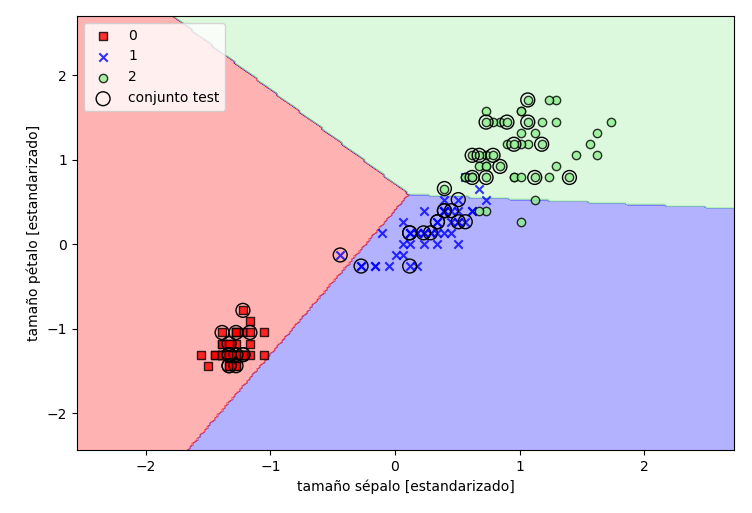

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('tamaño sépalo [estandarizado]')
plt.ylabel('tamaño pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Como se puede apreciar en la gráfica resultante, las tres clases de flores no se pueden separar perfectamente por un límite de decisión lineal.